# TCV-X21: A FAIR dataset for edge-turbulence validation

Welcome to TCV-X21. This is a repository designed to allow you to check the
analysis performed in *Oliveira and Body et al., 2021*. We hope that it is
sufficiently clear that you can set up simulations using a code of your
own and directly compare it to the results from the aforementioned paper.
If not, we'd be happy to help. The best way to contact the authors is via
"Issues" in the Gitlab repository. This means that everyone can see and benefit
from the discussion. We'll also aim to update this repository with new results
from other simulations, extended experimental results and improvements to
the repository.

To see details about installing the necessary analysis libraries and contents of
this repository, see `README.md`. The `README.md` also provides details about
the CC-BY-4.0 + MIT licence for this repository, as well as how to test your
development version. To get support or contribute to this repository,
see CONTRIBUTING.md.

# Introducing TCV-X21

TCV-X21 aims to be a "batteries-included" validation and benchmarking case for
magnetic-confinement-fusion edge- and divertor-turbulence codes. At its core,
it is a labelled dataset of experimental results from a series of TCV shots
performed as part of the EUROfusion ENR-MFE19.EPFL-02 project lef by Christian
Theiler. This is extended with a set of analysis routines designed to allow
a user to post-process, directly compare and quantitatively validate the
results of their simulation.

The motivation for the development of TCV-X21 was the lack of available
benchmarks in diverted geometry for comparing and testing edge- and
divertor-turbulence simulations of fusion experiments. This complicated the
evaluation, comparison and targeted development of the codes used to perform
these simulations.

The TCV-X21 scenario is *specifically designed
to make conditions as simple as possible for simulations*. That is, it is
a *test case for the most basic features of the code*, with the expectation
that more challenging validations will follow once the codes can match this
simple test case.

First, the scenario uses a reduced toroidal field strength ($0.95$ Tesla
instead of the usual $1.45$ Tesla). This increases the ion drift scale
(roughly, the ion Larmor radius using $T_e$ instead of $T_i$) by a factor
of $\sim 1.5$, reducing the resolution requirements by roughly
$\sim1.5^2 = 2.25$. This in turn reduces the computational cost.

# This notebook

This notebook doesn't do very much. It's simply a landing page for a jupyter lab session.
You can use it to play around with functionality in the `tcvx21` library.
If you're connecting via mybinder.org, note that your session (in this notebook and all
other notebooks in the lab session) will be wiped when you exit.
If you want to make permanent changes, it's best to use a local version of the notebooks,
rather than the mybinder.org session. See the README.md for how to set this up.

# Navigating the repository

Most of the functionality of the repository is provided by the `tcvx21` Python package,
which is in the `tcvx21` subfolder.

We include Jupyter notebooks in the `notebooks` subfolder, which show how to use this
functionality. We include notebooks to

1. Show you how to find the data needed to set up a simulation of your own
2. Provide an example of post-processing data from a simulation 
3. A few interesting analyses, in `data_exploration`
4. `bulk_process.ipynb`, which makes all of the figures and tables in `results`

The data and some notebooks for preprocessing are provided in the `data` subfolder.



In [1]:
# As a first step, let's import some of the functionality that we need.
# If this fails, make sure that you've followed the instructions in installation.md
# You'll want to include this cell for most notebooks in this analysis

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from netCDF4 import Dataset

import tcvx21
from tcvx21 import Quantity
# Apply the custom style sheet, which makes the plots look the same
plt.style.use(tcvx21.style_sheet_inline)

Space for you to work! Check the other notebooks to see examples of how to interface with the repository. To get you started, we show how to plot the density data from the low-field-side Langmuir probe (note that this is uncropped, unlike in the paper.) and how to perform unit conversions with Pint.


In [2]:
from tcvx21 import Quantity

my_temp = Quantity(13.5, 'eV')
kB = Quantity(1, 'boltzmann_constant')

print(f"My temperature was {my_temp}, which is {(my_temp/kB).to('kelvin')}")

My temperature was 13.5 eV, which is 156660.9946409261 K


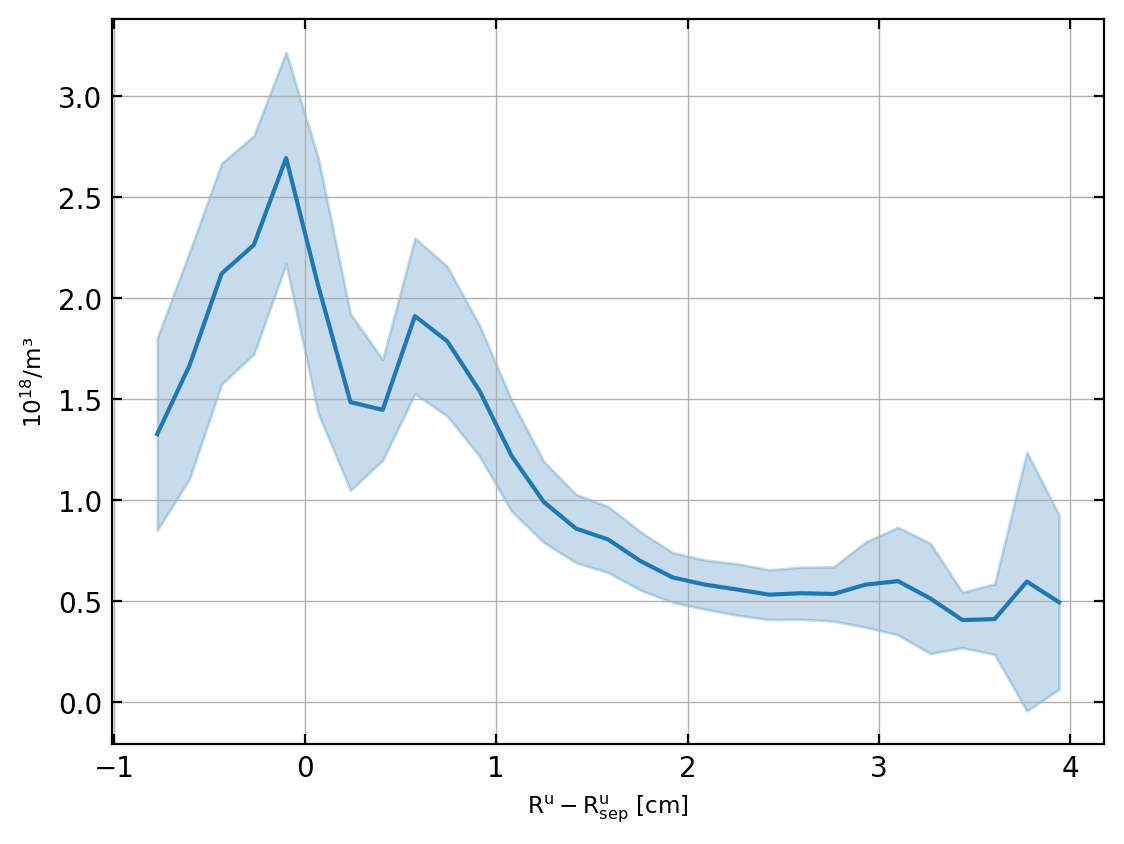

In [3]:
from tcvx21 import Record

# Experiment reference data
experimental_data = dict(
    forward_field=Record(tcvx21.experimental_reference_dir / 'TCV_forward_field.nc', color='C0'),
    reversed_field=Record(tcvx21.experimental_reference_dir / 'TCV_reversed_field.nc', color='C0')
)

experimental_data['forward_field'].get_observable('LFS-LP', 'density').plot()